# LIS590DV Final Project - Group Athena
## Part1 - Shapes with Route Colors
### Author: Hui Lyu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
import csv
from collections import Counter

In [2]:
%matplotlib inline

In [3]:
trips_df = pd.read_csv("GTFS Dataset/trips.csv")
routes_df = pd.read_csv("GTFS Dataset/routes.csv")
shapes_df = pd.read_csv("GTFS Dataset/shapes.csv")

In [4]:
routes_df[routes_df.route_id=='BRONZE YANKEE RIDGE']

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
28,BRONZE YANKEE RIDGE,CUMTD,8,Bronze Yankee Ridge,NaN,3,NaN,9e8966,000000


In [5]:
exist = []
for k in np.arange(100):
    exist.append(routes_df[routes_df.route_id==np.unique(trips_df["route_id"])[k]][["route_id"]])

# There is a route which does not have any trip.
not_exist_route_id = 'BRONZE YANKEE RIDGE'

routes_df = routes_df[routes_df.route_id!='BRONZE YANKEE RIDGE']

In [6]:
len(np.unique(routes_df["route_color"]))

21

In [7]:
Counter(routes_df["route_color"])

Counter({'000000': 1,
         '006991': 8,
         '008063': 18,
         '2b3088': 1,
         '355caa': 1,
         '5a1d5a': 9,
         '808285': 8,
         '823822': 2,
         '825622': 2,
         '9e8966': 2,
         'a78bc0': 5,
         'b2d235': 4,
         'c7994a': 4,
         'cccccc': 7,
         'd1d3d4': 4,
         'eb008b': 5,
         'ed1c23': 1,
         'ed1c24': 1,
         'f99f2a': 3,
         'fcee1f': 13,
         'ffbfff': 1})

In [8]:
len(np.unique(shapes_df["shape_id"]))

677

In [9]:
len(np.unique(trips_df["shape_id"]))

677

In [10]:
len(np.unique(trips_df["trip_id"]))

5498

In [11]:
# route_id -> route_color
route_color_dict = {}
for route in routes_df["route_id"]:
    route_color_dict[route]=routes_df[routes_df.route_id==route][["route_color"]]

route_color_dict

{'1 YELLOW ALT':    route_color
 55      fcee1f, '10W GOLD ALT':    route_color
 77      c7994a, '1N YELLOW ALT':    route_color
 88      fcee1f, '1N YELLOW ALT PM':    route_color
 51      fcee1f, '1S YELLOW ALT':    route_color
 89      fcee1f, '3S LAVENDER ALT':    route_color
 11      a78bc0, '5E GREEN EXPRESS 1 ALT':   route_color
 9      008063, '5E GREEN EXPRESS ALT':    route_color
 22      008063, '5W GREEN ALT 2':    route_color
 39      008063, '5W GREEN EXPRESS 2':    route_color
 86      008063, '7E GREY ALT':    route_color
 48      808285, '7W GREY ALT':    route_color
 92      808285, 'BLUE':    route_color
 61      355caa, 'BRONZE':    route_color
 85      9e8966, 'BRONZE ALT':    route_color
 70      9e8966, 'BROWN':    route_color
 50      825622, 'BROWN ALT':    route_color
 36      823822, 'BROWN ALT PM':   route_color
 3      823822, 'BROWN ALT1':    route_color
 87      825622, 'GOLD':    route_color
 34      c7994a, 'GOLD ALT':   route_color
 0      c7994a, 'GOL

In [12]:
# shape_id -> route_id
shape_route_dict = {}
for shape in trips_df["shape_id"]:
    shape_route_dict[shape]=np.unique(trips_df[trips_df.shape_id==shape][["route_id"]])

In [13]:
shape_route_dict

{'1 YELLOW ALT 25': array(['1 YELLOW ALT'], dtype=object),
 '100 LATE 3': array(['YELLOW LATE NIGHT'], dtype=object),
 '100 LATE 5': array(['YELLOW LATE NIGHT'], dtype=object),
 '100N': array(['YELLOW EVENING'], dtype=object),
 '100N->IT': array(['YELLOW EVENING'], dtype=object),
 '100N-LATE': array(['YELLOW LATE NIGHT'], dtype=object),
 '100NIT->': array(['YELLOW EVENING'], dtype=object),
 '100NLTNT->': array(['YELLOW LATE NIGHT'], dtype=object),
 '100S': array(['YELLOW EVENING'], dtype=object),
 '100S->PLAZA': array(['YELLOW EVENING'], dtype=object),
 '100SLTNT->': array(['YELLOW LATE NIGHT'], dtype=object),
 '10E': array(['GOLD'], dtype=object),
 '10W AMBP->LSG': array(['GOLD'], dtype=object),
 '10W GOLD ALT 1': array(['10W GOLD ALT'], dtype=object),
 '10WLSG->': array(['GOLD'], dtype=object),
 '10WSV1': array(['GOLD'], dtype=object),
 '120W TEAL LATE 12': array(['TEAL LATE NIGHT'], dtype=object),
 '12E TEAL 13': array(['TEAL'], dtype=object),
 '12E TEAL WEEKEND 13': array(['TEAL SA

In [14]:
# shape_id -> route_color
shape_color_dict = {}

for shape, route in shape_route_dict.items():
    for route_id in route:
        shape_color_dict[shape]=route_color_dict[route_id]

"#"+str(shape_color_dict['20U ->IU'])[-6:]

'#ed1c23'

In [15]:
df_shapes_group = pd.DataFrame()
df_shapes_group = shapes_df.groupby("shape_id")

In [16]:
str(shape_route_dict['20U ->IU'])[2:-2]

'RED SATURDAY'

In [17]:
for name, group in df_shapes_group:
    shape_color_dict[name]

In [18]:
# route_color -> route_id
color_map_test = {}
for color,count in Counter(routes_df["route_color"]).items():
    color_map_test[color]=[]
    color_map_test[color].append(routes_df[routes_df.route_color==color][["route_id"]])

color_map_test

{'000000': [   route_id
  90    RAVEN], '006991': [                    route_id
  7     TEAL LATE NIGHT SUNDAY
  18             TEAL SATURDAY
  30  TEAL LATE NIGHT SATURDAY
  52           TEAL LATE NIGHT
  65     TEAL EVENING SATURDAY
  66              TEAL EVENING
  78               TEAL SUNDAY
  93                      TEAL], '008063': [                        route_id
  5         GREEN EVENING SATURDAY
  8      GREEN LATE NIGHT SATURDAY
  9         5E GREEN EXPRESS 1 ALT
  10                GREEN SATURDAY
  16  GREENHOPPER EVENING SATURDAY
  22          5E GREEN EXPRESS ALT
  24                   GREENHOPPER
  25                         GREEN
  32             GREEN EXPRESS ALT
  33           GREENHOPPER EVENING
  39                5W GREEN ALT 2
  57                     GREEN ALT
  60                 GREEN EVENING
  69       GREEN LATE NIGHT SUNDAY
  74              GREEN LATE NIGHT
  82                  GREEN SUNDAY
  86            5W GREEN EXPRESS 2
  96                 GREEN EXPR

In [19]:
color_map = {}
color_map['#000000']="RAVEN"
color_map['#006991']="TEAL Series"
color_map['#008063']="GREEN Series"
color_map['#2b3088']="NAVY"
color_map['#355caa']="BLUE"
color_map['#5a1d5a']="ILLINI Series"
color_map['#808285']="GREY Series"
color_map['#823822']="BROWN ALT (PM)"
color_map['#825622']="BROWN & BROWN ALT1"
color_map['#9e8966']="BRONZE Series"
color_map['#a78bc0']="LAVENDER Series"
color_map['#b2d235']="LIME Series"
color_map['#c7994a']="GOLD Series"
color_map['#cccccc']="SILVER Series"
color_map['#d1d3d4']="SILVER LIMITED Series"
color_map['#eb008b']="RUBY Series"
color_map['#ed1c23']="RED SATURDAY"
color_map['#ed1c24']="RED"
color_map['#f99f2a']="ORANGE Series"
color_map['#fcee1f']="YELLOW Series"
color_map['#ffbfff']="PINK"

color_map

{'#000000': 'RAVEN',
 '#006991': 'TEAL Series',
 '#008063': 'GREEN Series',
 '#2b3088': 'NAVY',
 '#355caa': 'BLUE',
 '#5a1d5a': 'ILLINI Series',
 '#808285': 'GREY Series',
 '#823822': 'BROWN ALT (PM)',
 '#825622': 'BROWN & BROWN ALT1',
 '#9e8966': 'BRONZE Series',
 '#a78bc0': 'LAVENDER Series',
 '#b2d235': 'LIME Series',
 '#c7994a': 'GOLD Series',
 '#cccccc': 'SILVER Series',
 '#d1d3d4': 'SILVER LIMITED Series',
 '#eb008b': 'RUBY Series',
 '#ed1c23': 'RED SATURDAY',
 '#ed1c24': 'RED',
 '#f99f2a': 'ORANGE Series',
 '#fcee1f': 'YELLOW Series',
 '#ffbfff': 'PINK'}

In [20]:
handles = []
for key, value in sorted(color_map.items()):
    handles.append(mpatches.Patch(color=key,label=value))

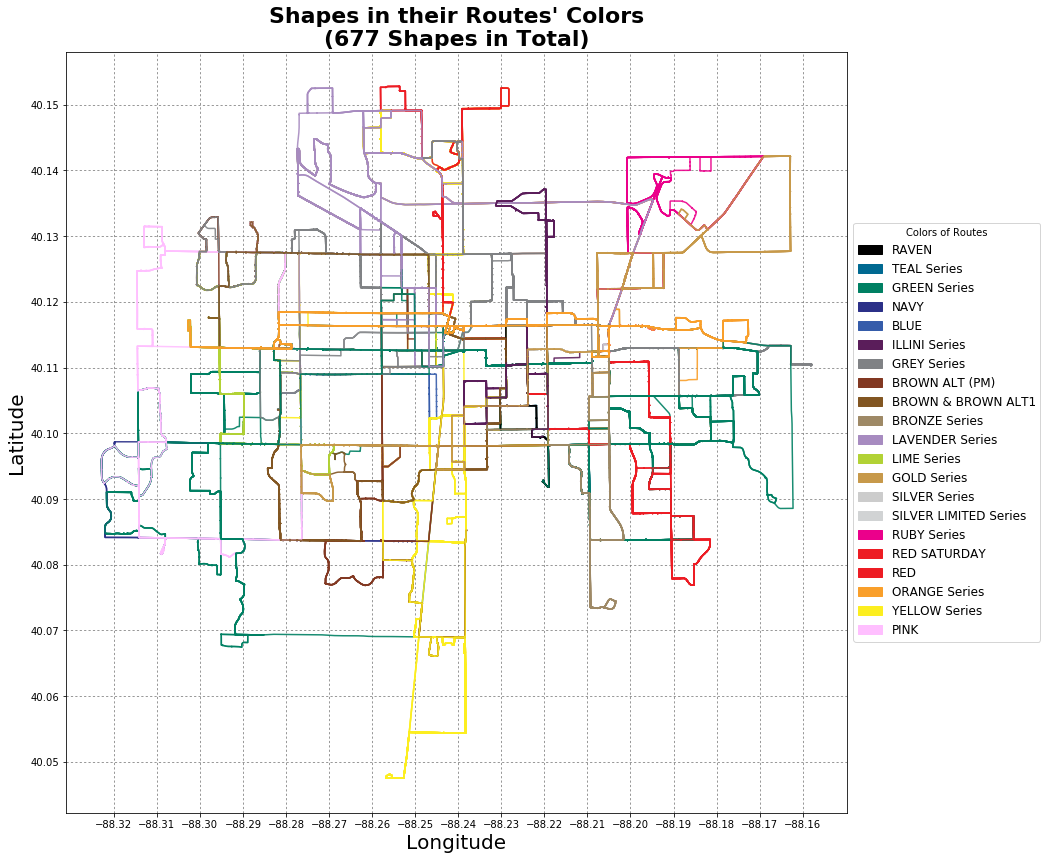

In [21]:
plt.rcParams["figure.figsize"] = (14, 14)

for name, group in df_shapes_group:
    plt.plot(group['shape_pt_lon'],group['shape_pt_lat'],color="#"+str(shape_color_dict[name])[-6:],linestyle="solid",linewidth=1.5,alpha=0.9)

plt.xlabel("Longitude",fontsize=20)
plt.ylabel("Latitude",fontsize=20)
plt.title("Shapes in their Routes' Colors\n(677 Shapes in Total)",fontweight="bold",fontsize=22)
plt.grid(color='gray', linestyle='dotted')

ax=plt.gca()
ax.set_yticks(np.arange(40.05,40.16,0.01))
ax.set_xticks(np.arange(-88.32,-88.15,0.01))
ax.legend(title="Colors of Routes",handles=handles,prop={'size':12},loc='center left', bbox_to_anchor=(1,0.5))

plt.savefig('Shapes in Routes Colors.svg', bbox_inches='tight')
plt.savefig('Shapes in Routes Colors.png', bbox_inches='tight')